In [1]:
# ==========================================
# 🔬 Point-Field Morphometrics:
# A Creative Scatter Plot Atlas
# (NumPy, Pandas, Matplotlib)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D)

plt.rcParams["figure.figsize"] = (8, 5)
np.random.seed(123)

# ---------- Synthetic dataset ----------
n = 600
centers = np.array([[0, 0], [3.0, 1.5], [-2.5, 3.0]])
labels = np.random.choice(len(centers), size=n, p=[0.4, 0.35, 0.25])
noise = np.random.normal(scale=0.6, size=(n, 2))
xy = centers[labels] + noise

x = xy[:, 0]
y = 1.4 * x + np.random.normal(0, 1.2, n)  # correlated target for trendline demos
mag = np.sqrt((xy**2).sum(axis=1))          # magnitude for color/size encoding
cat = np.array(["A", "B", "C"])[labels]
t = pd.date_range("2025-01-01", periods=n, freq="D")  # time axis

df_sc = pd.DataFrame({"x": x, "y": y, "mag": mag, "cat": cat, "t": t})
df_sc.head()


,x,y,mag,cat,t
0,3.637329,5.028929,4.209162,B,2025-01-01
1,1.350406,0.098486,1.393181,A,2025-01-02
2,-0.902075,0.278160,0.912785,A,2025-01-03
3,2.505005,3.343221,2.843673,B,2025-01-04
4,2.369869,0.735278,3.000759,B,2025-01-05


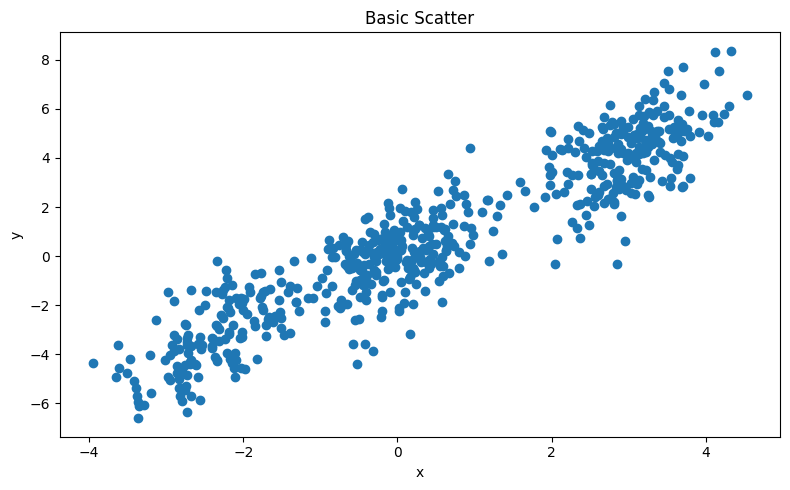

In [2]:
plt.figure()
plt.scatter(df_sc["x"], df_sc["y"])
plt.title("Basic Scatter")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()


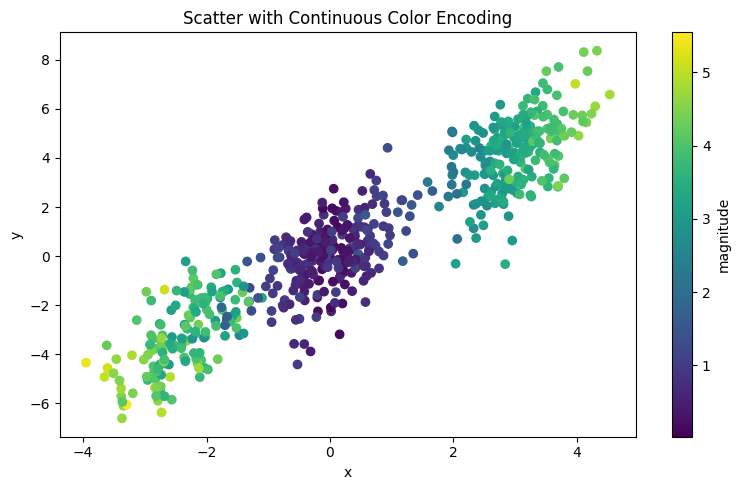

In [3]:
plt.figure()
sc = plt.scatter(df_sc["x"], df_sc["y"], c=df_sc["mag"])
plt.colorbar(sc, label="magnitude")
plt.title("Scatter with Continuous Color Encoding")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()


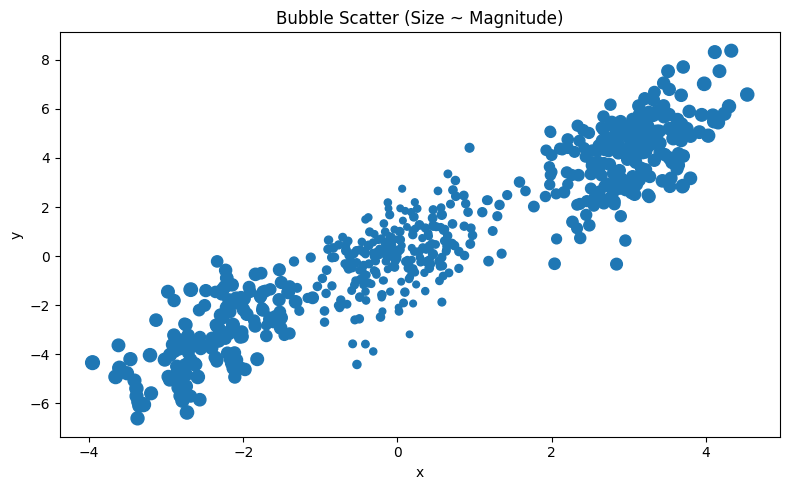

In [4]:
plt.figure()
sizes = 20 + 80 * (df_sc["mag"] - df_sc["mag"].min()) / (df_sc["mag"].max() - df_sc["mag"].min())
plt.scatter(df_sc["x"], df_sc["y"], s=sizes)
plt.title("Bubble Scatter (Size ~ Magnitude)")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()


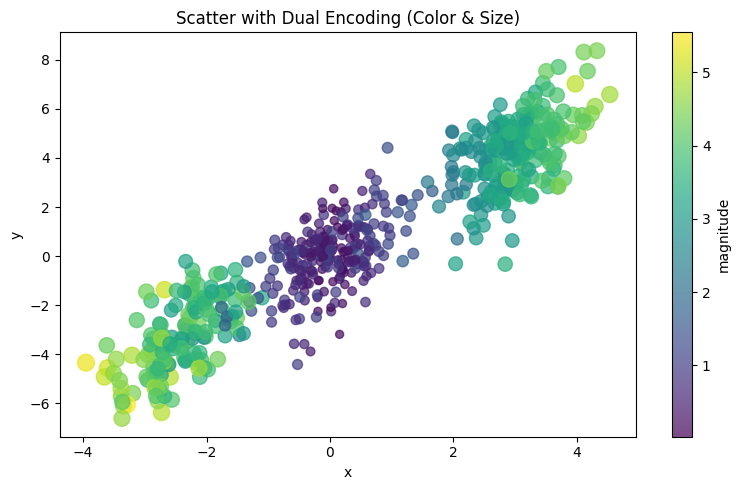

In [5]:
plt.figure()
sizes = 30 + 120 * (df_sc["mag"] - df_sc["mag"].min()) / (df_sc["mag"].max() - df_sc["mag"].min())
sc = plt.scatter(df_sc["x"], df_sc["y"], c=df_sc["mag"], s=sizes, alpha=0.7)
plt.colorbar(sc, label="magnitude")
plt.title("Scatter with Dual Encoding (Color & Size)")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()


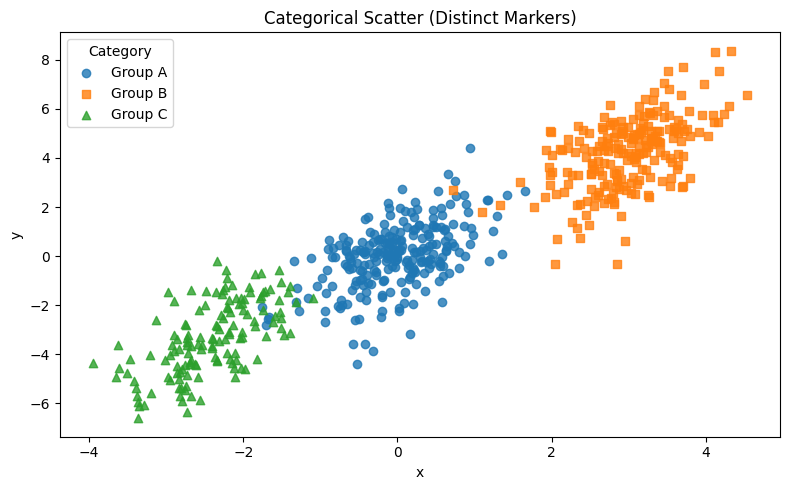

In [6]:
plt.figure()
markers = {"A": "o", "B": "s", "C": "^"}
for g, sub in df_sc.groupby("cat"):
    plt.scatter(sub["x"], sub["y"], label=f"Group {g}", marker=markers[g], alpha=0.8)
plt.legend(title="Category")
plt.title("Categorical Scatter (Distinct Markers)")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()


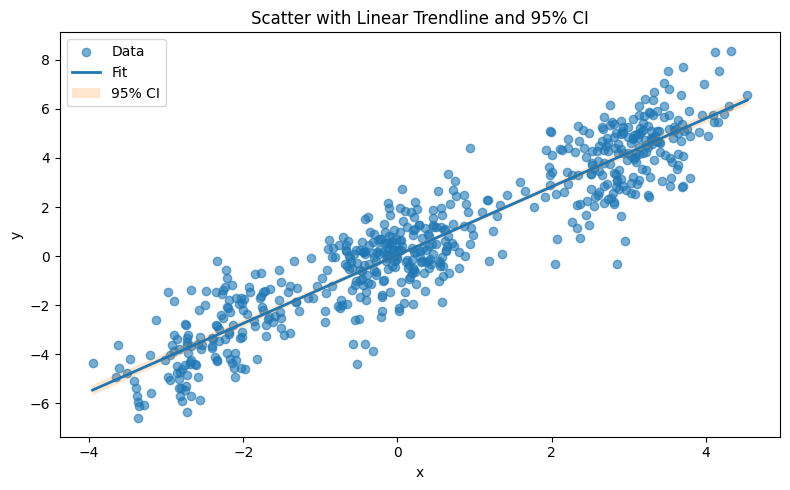

In [7]:
xv = df_sc["x"].values; yv = df_sc["y"].values
b1, b0 = np.polyfit(xv, yv, deg=1)  # y = b1*x + b0
x_grid = np.linspace(xv.min(), xv.max(), 300)
y_pred = b1 * x_grid + b0

# 95% CI for mean prediction
n = len(xv); x_bar = xv.mean(); ssx = ((xv - x_bar)**2).sum()
resid = yv - (b1 * xv + b0)
s2 = (resid**2).sum() / (n - 2)
se = np.sqrt(s2 * (1/n + (x_grid - x_bar)**2 / ssx))
ci = 1.96 * se

plt.figure()
plt.scatter(xv, yv, alpha=0.6, label="Data")
plt.plot(x_grid, y_pred, linewidth=2, label="Fit")
plt.fill_between(x_grid, y_pred - ci, y_pred + ci, alpha=0.2, label="95% CI")
plt.title("Scatter with Linear Trendline and 95% CI")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.tight_layout(); plt.show()


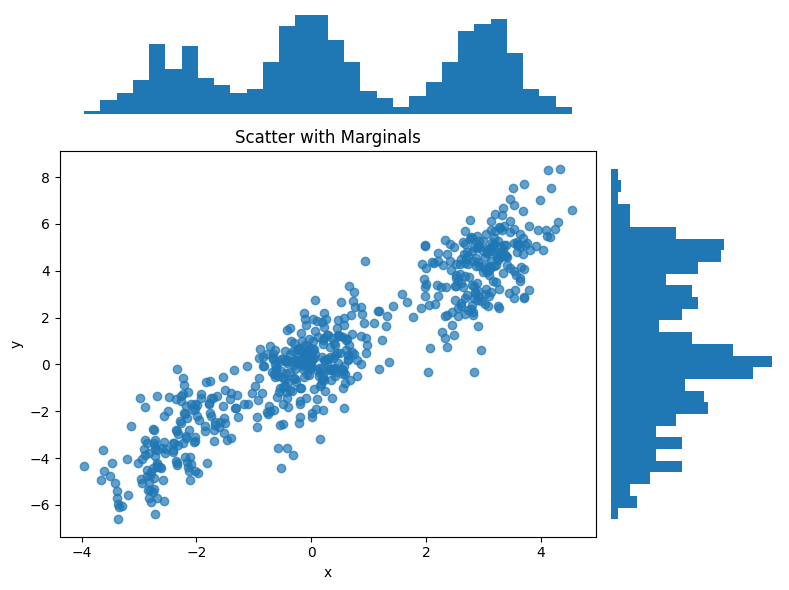

In [8]:
fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(4, 4)
ax_sc = fig.add_subplot(gs[1: , :3])
ax_xm = fig.add_subplot(gs[0,  :3], sharex=ax_sc)
ax_ym = fig.add_subplot(gs[1: , 3], sharey=ax_sc)

ax_sc.scatter(df_sc["x"], df_sc["y"], alpha=0.7)
ax_sc.set_xlabel("x"); ax_sc.set_ylabel("y"); ax_sc.set_title("Scatter with Marginals")

ax_xm.hist(df_sc["x"], bins=30)
ax_xm.axis("off")

ax_ym.hist(df_sc["y"], bins=30, orientation="horizontal")
ax_ym.axis("off")

plt.tight_layout(); plt.show()


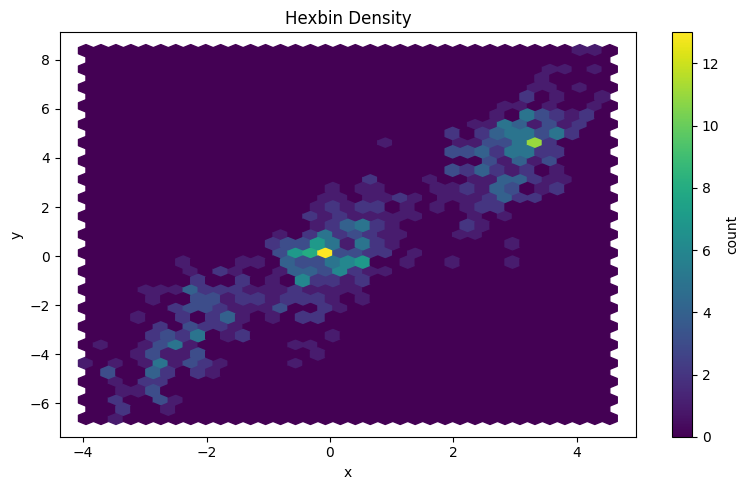

In [9]:
plt.figure()
hb = plt.hexbin(df_sc["x"], df_sc["y"], gridsize=35)
plt.colorbar(hb, label="count")
plt.title("Hexbin Density")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()


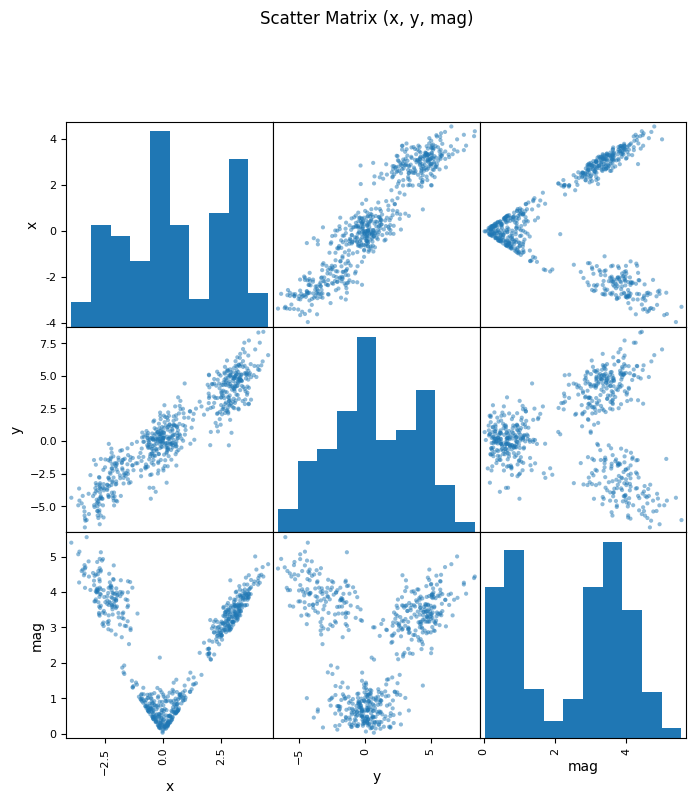

In [10]:
from pandas.plotting import scatter_matrix
cols = ["x", "y", "mag"]
axes = scatter_matrix(df_sc[cols], diagonal="hist", figsize=(8,8))
plt.suptitle("Scatter Matrix (x, y, mag)", y=1.02)
plt.show()



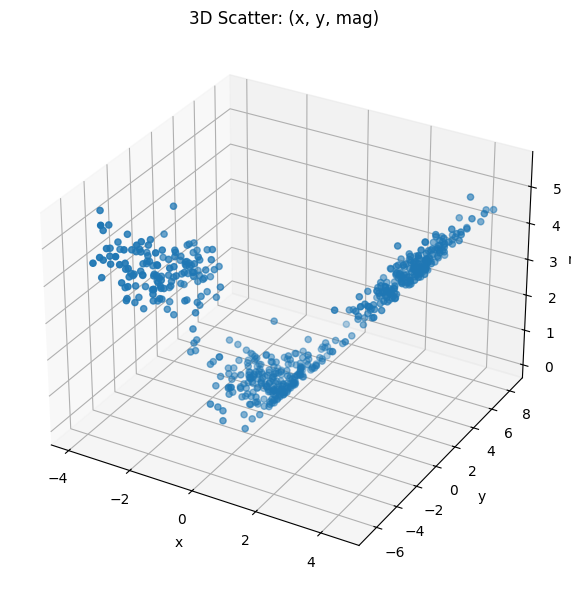

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df_sc["x"], df_sc["y"], df_sc["mag"])
ax.set_title("3D Scatter: (x, y, mag)")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("mag")
plt.tight_layout(); plt.show()



In [12]:
# If needed:
# !pip install plotly

import plotly.express as px
import plotly.graph_objects as go

# Interactive bubble scatter (color + size)
fig = px.scatter(df_sc, x="x", y="y", color="cat", size="mag", title="Interactive Bubble Scatter")
fig.show()

# Interactive scatter with marginals
fig = px.scatter(df_sc, x="x", y="y", color="cat", marginal_x="histogram", marginal_y="histogram",
                 title="Interactive Scatter with Marginals")
fig.show()

# Interactive 3D scatter
fig = px.scatter_3d(df_sc, x="x", y="y", z="mag", color="cat", title="Interactive 3D Scatter")
fig.show()

# Time-animated scatter (playhead over t)
fig = px.scatter(df_sc.sort_values("t"), x="x", y="y", color="cat", animation_frame=df_sc["t"].dt.strftime("%Y-%m-%d"),
                 range_x=[df_sc["x"].min()-1, df_sc["x"].max()+1],
                 range_y=[df_sc["y"].min()-1, df_sc["y"].max()+1],
                 title="Animated Scatter over Time")
fig.show()
